Version 2024.01.04 - A. Lundervold

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/ELMED219/blob/main/Lab0-ML/Lab0-03-patient-similarity-networks.ipynb)

# Patient similarity networks



### Introduction (IRIS Flower Similarity Network)

We will use the famous  IRIS flower dataset with 4 different measurements from each of the 150 flowers. Please make a weighted, undirected graph G=(V, E) where V is the nodes (flowers), and E is the set of edges. The weight of an edge between two nodes is calculated as the similarity between this pair of flowers in terms of the Euclidean distance between their measurements in 4D feature space. The nodes should be colored according to their species: versicolor, setosa, or virginica. Make  Python code using NetworkX and produce a graph showing this "flower similarity network", and also make a Pandas data frame representing the adjacency matrix of this graph.

### Import libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
import networkx as nx

This cell is importing several Python libraries that are commonly used for data analysis and visualization:

- `numpy`: This is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

- `pandas`: This is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

- `matplotlib.pyplot`: This is a plotting library used for 2D graphics in python programming language. It can be used in python scripts, shell, web application servers and other graphical user interface toolkits.

- `sklearn`: This is a machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

- `sklearn.datasets.load_iris`: This is a function that loads and returns the iris dataset (classification). The iris dataset is a classic and very easy multi-class classification dataset.

- `networkx`: This is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [7]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
species = iris.target_names
species

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

This Python cell is loading the Iris dataset, which is a popular dataset in machine learning and statistics. It is often used for testing out machine learning algorithms and visualizations. Here's what each line does:

1. The comment `# Load the Iris dataset` is just a note for anyone reading the code.
2. `iris = load_iris()` calls the `load_iris` function, which is a part of `sklearn.datasets`. This function loads and returns the Iris dataset.
3. `X, y = iris.data, iris.target` is unpacking the data and target attributes of the Iris dataset into `X` and `y` respectively. `X` contains the features (sepal length, sepal width, petal length, and petal width) and `y` contains the labels (species of Iris flowers).
4. `species = iris.target_names` is getting the names of the species of Iris flowers (setosa, versicolor, virginica) from the `target_names` attribute of the Iris dataset and storing them in `species`.
5. `species` is just outputting the value of `species`, which should be an array of the species names.

In [8]:
# Create a weighted, undirected graph
G = nx.Graph()
G

This Python cell is creating an undirected, weighted graph using the NetworkX library. Here's what each line does:

1. The comment `# Create a weighted, undirected graph` is just a note for anyone reading the code.
2. `G = nx.Graph()` creates an empty undirected graph and assigns it to the variable `G`. NetworkX's `Graph` class is used to create undirected graphs.
3. `G` is just outputting the representation of the graph `G`, which should be an empty graph since no nodes or edges have been added yet.

In [9]:
# Add nodes with the species (Setosa, Versicolor, Virginica) as an attribute for color (R, G, B)
for i in range(len(X)):
    G.add_node(i, species=species[y[i]])

# List the first 3 nodes with their species
print(list(G.nodes(data=True))[:3])

# List the last 3 nodes with their species
print(list(G.nodes(data=True))[-3:])

[(0, {'species': 'setosa'}), (1, {'species': 'setosa'}), (2, {'species': 'setosa'})]
[(147, {'species': 'virginica'}), (148, {'species': 'virginica'}), (149, {'species': 'virginica'})]


This Python cell is adding nodes to the graph `G`. Here's what each line does:

1. The comment `# Add nodes with the species ... as an attribute for color ...` is just a note for anyone reading the code.
2. The `for` loop `for i in range(len(X)):` is iterating over the length of `X`, which is the features of the Iris dataset.
3. Inside the loop, `G.add_node(i, species=species[y[i]])` is adding a node to the graph `G` for each feature in `X`. The node is given an attribute `species` which is set to the species of the Iris flower corresponding to the current feature. The species is retrieved from the `species` array using the label from `y` as the index.
4. The comment `# List the first 3 nodes with their species` is just a note for anyone reading the code.
5. `print(list(G.nodes(data=True))[:3])` is printing the first 3 nodes of the graph `G` along with their attributes. The `data=True` argument means that the node attributes are returned along with the nodes.
6. The comment `# List the last 3 nodes with their species` is just a note for anyone reading the code.
7. `print(list(G.nodes(data=True))[-3:])` is printing the last 3 nodes of the graph `G` along with their attributes. The `data=True` argument means that the node attributes are returned along with the nodes.

In [10]:
# Calculate the Euclidean distance between each pair of flowers and add an edge if they are different flowers
for i in range(len(X)):
    for j in range(i+1, len(X)):
        weight = np.linalg.norm(X[i] - X[j])
        G.add_edge(i, j, weight=weight)

Here's the algorithm described in the cell, converted into Markdown with LaTeX:

The algorithm calculates the Euclidean distance between each pair of flowers and adds an edge between them if they are different flowers. The steps are as follows:

1. Iterate over each flower `i` in the dataset `X`:

    ```markdown
    for i in range(len(X)):
    ```

2. For each flower `i`, iterate over each subsequent flower `j` in the dataset `X`:

    ```markdown
    for j in range(i+1, len(X)):
    ```

3. Calculate the Euclidean distance between the feature vectors of flowers `i` and `j`. This is done using the numpy function `np.linalg.norm` on the difference between the two feature vectors:

    ```markdown
    weight = np.linalg.norm(X[i] - X[j])
    ```

    The Euclidean distance is calculated as:

    $$ \text{weight} = \sqrt{\sum_{k=1}^{n} (X[i][k] - X[j][k])^2} $$

    where `n` is the number of features in the feature vectors.

4. Add an edge between nodes `i` and `j` in the graph `G`, with the Euclidean distance as the weight of the edge:

    ```markdown
    G.add_edge(i, j, weight=weight)
    ```

### YOUR TURN:


_However, this algorithm using Euclidean distance directly is not the best way to calculate the **similarity** between two flowers (WHY?)_

A better way is to use the **normalized inverse Euclidean distance** as the similarity between the two feature vectors.<br> The normalized inverse Euclidean distance is calculated as:

$$ \text{similarity} = \frac{1}{1 + \text{weight}} $$

where `weight` is the Euclidean distance between the two feature vectors (_WHY?_)

_What happens to similarity when the weight is large?_ <br>
_What happens to similarity when the weight is small?_

In [11]:
# List the first 10 edges
list(G.edges(data=True))[:10]


[(0, 1, {'weight': 0.5385164807134502}),
 (0, 2, {'weight': 0.509901951359278}),
 (0, 3, {'weight': 0.648074069840786}),
 (0, 4, {'weight': 0.1414213562373093}),
 (0, 5, {'weight': 0.6164414002968979}),
 (0, 6, {'weight': 0.5196152422706632}),
 (0, 7, {'weight': 0.17320508075688762}),
 (0, 8, {'weight': 0.9219544457292882}),
 (0, 9, {'weight': 0.4690415759823426}),
 (0, 10, {'weight': 0.37416573867739483})]

Calculate the normalized inverse Euclidean distance between each pair of flowers and add an edge if they are different flowers

In [12]:
# Calculate the normalized inverse Euclidean distance between each pair of flowers and add an edge if they are different flowers
for i in range(len(X)):
    for j in range(i+1, len(X)):
        weight = 1 / (1.0 + (np.linalg.norm(X[i] - X[j])))
        G.add_edge(i, j, weight=weight)

 

In [13]:
# List the first 10 edges
list(G.edges(data=True))[:10]

[(0, 1, {'weight': 0.6499767877275348}),
 (0, 2, {'weight': 0.6622946603252996}),
 (0, 3, {'weight': 0.6067688451020932}),
 (0, 4, {'weight': 0.8761006569007048}),
 (0, 5, {'weight': 0.6186429027469392}),
 (0, 6, {'weight': 0.6580613119579956}),
 (0, 7, {'weight': 0.8523658961269199}),
 (0, 8, {'weight': 0.5203036951380753}),
 (0, 9, {'weight': 0.6807159282277656}),
 (0, 10, {'weight': 0.7277142573518669})]

### YOUR TURN:

_What are the main qualitative differences between edge weights in G using Euclidean distances as a similarity measeure versus using normalized inverse Euclidian distance?_

When using Euclidean distances as edge weights in a graph, the weight represents the "distance" or dissimilarity between two nodes. A larger weight indicates that the nodes are more dissimilar or further apart.

1. **Euclidean Distance**: In this case, a larger weight (distance) means the nodes (data points) are more dissimilar. So, nodes that are very similar (close together in the feature space) will have a small edge weight, and nodes that are very different (far apart in the feature space) will have a large edge weight.

2. **Normalized Inverse Euclidean Distance**: In this case, a larger weight means the nodes are more similar. This is because we take the inverse of the Euclidean distance, so a smaller original distance (more similar nodes) results in a larger weight. Normalizing these inverse distances (for example, by scaling them to be between 0 and 1) ensures that the weights are not overly influenced by extreme values or differences in units.

In summary, the main qualitative difference is that with Euclidean distances, larger weights represent more dissimilar nodes, while with normalized inverse Euclidean distances, larger weights represent more similar nodes.

#### Based on the graph, we can see that the Setosa species is very different from the Versicolor and Virginica species.

In [14]:
# Create a dictionary to map species to colors
color_dict = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Create a color map with a color for each node in the graph
color_map = [color_dict[G.nodes[node]['species']] for node in G.nodes]

# Draw nodes with color by species and edges with weights
nx.draw(G, pos=None, node_color=color_map, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues, with_labels=False)
plt.title("Iris Flower Similarity Network")
plt.show()

NameError: name 'weights' is not defined

This Python cell is visualizing the graph `G` using the NetworkX library. Here's what each line does:

1. The comment `# Create a dictionary to map species to colors` is just a note for anyone reading the code.
2. `color_dict = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}` creates a dictionary that maps the species names to colors.
3. The comment `# Create a color map with a color for each node in the graph` is just a note for anyone reading the code.
4. `color_map = [color_dict[G.nodes[node]['species']] for node in G.nodes]` creates a list of colors corresponding to the species of each node in the graph `G`. This list is created by iterating over the nodes in `G` and using the species attribute of each node to get the corresponding color from `color_dict`.
5. The comment `# Draw nodes with color by species and edges with weights` is just a note for anyone reading the code.
6. `nx.draw(G, pos, node_color=color_map, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues, with_labels=False)` draws the graph `G` with the positions specified by `pos`, the node colors specified by `color_map`, and the edge colors specified by `weights`. The edge colors are mapped to the Blues colormap, and labels are not drawn for the nodes.
7. `plt.title("Iris Flower Similarity Network")` sets the title of the plot to "Iris Flower Similarity Network".
8. `plt.show()` displays the plot.

### YOUR TURN:

_What is the meaning of the edge colors in the graph?_

_What is the pos argument in the nx.draw function?_

_What else can you do to improve the visualization of the graph?_

- The edge colors represent the weights of the edges. The weights are the normalized inverse Euclidean distances between the feature vectors of the flowers corresponding to the nodes connected by the edges. The colors are mapped to the Blues colormap, so darker colors represent larger weights (more similar nodes) and lighter colors represent smaller weights (more dissimilar nodes).



- In the provided code, `pos=None` in the `nx.draw()` function call. This means that the positions of the nodes are not explicitly specified and NetworkX will automatically calculate the positions. By default, NetworkX uses the Fruchterman-Reingold force-directed algorithm to compute the node positions. This algorithm treats the edges as springs holding the nodes close, while treating the nodes as repelling objects, and finds a balance of these forces to determine the positions. This often results in a visually pleasing, symmetric layout.<br>
If you want to specify your own node positions, you can provide a dictionary to `pos` where the keys are node indices and the values are (x, y) coordinate pairs. For example: `pos = {0: (1, 1), 1: (2, 2)}`.

- There are several ways to improve the visualization of a graph:

1. **Node Size**: You can adjust the size of the nodes based on their degree (number of connections) or other attributes. This can help highlight important nodes.

2. **Edge Thickness**: You can adjust the thickness of the edges based on their weight or other attributes. This can help highlight important connections.

3. **Color**: You can use color to represent different attributes of the nodes or edges. For example, you could color nodes based on their community or cluster.

4. **Layout**: NetworkX provides several layout algorithms that can be used to position the nodes. Different layouts can provide different perspectives on the graph.

5. **Labels**: Adding labels to nodes or edges can provide additional information. However, be careful not to clutter the visualization with too many labels.

6. **Interactive Visualization**: Libraries like Bokeh or Plotly allow for interactive graph visualizations, where you can zoom, pan, and hover to get more information.

7. **3D Visualization**: For complex graphs, a 3D visualization might be helpful. Libraries like PyGraphviz or Plotly can create 3D graph visualizations.

Remember, the best way to visualize a graph often depends on the specific characteristics of the graph and what you want to highlight or investigate.

### The corresponding adjacency matrix as a Pandas data frame

In [15]:
# Create the adjacency matrix as a pandas DataFrame
adj_matrix = nx.to_pandas_adjacency(G, weight='weight')
adj_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.649977,0.662295,0.606769,0.876101,0.618643,0.658061,0.852366,0.520304,0.680716,...,0.166114,0.177405,0.192000,0.159811,0.162969,0.176865,0.189513,0.183156,0.176966,0.194551
1,0.649977,0.000000,0.769231,0.750941,0.621784,0.478270,0.662295,0.702117,0.662295,0.852366,...,0.164678,0.175373,0.193016,0.158210,0.161116,0.175439,0.190487,0.181855,0.174885,0.194050
2,0.662295,0.769231,0.000000,0.803246,0.662295,0.479322,0.790779,0.708060,0.696432,0.759747,...,0.160545,0.170408,0.187450,0.154431,0.157393,0.170528,0.184143,0.176630,0.170978,0.188721
3,0.606769,0.750941,0.803246,0.000000,0.606769,0.461640,0.750941,0.666667,0.769231,0.759747,...,0.163803,0.173604,0.193150,0.157486,0.160447,0.174049,0.189095,0.180727,0.174852,0.194186
4,0.876101,0.621784,0.662295,0.606769,0.000000,0.618643,0.685750,0.817256,0.520304,0.653958,...,0.164972,0.175866,0.190615,0.158802,0.161996,0.175406,0.187613,0.181671,0.176097,0.193284


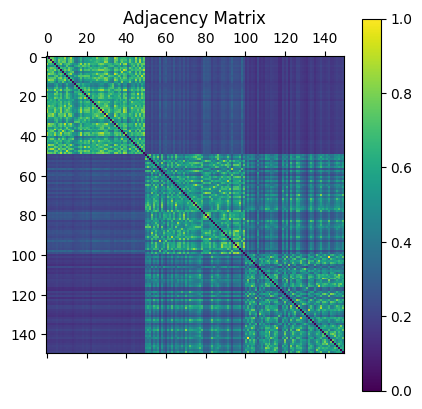

In [16]:
# Make an image of the adjacency matrix of the graph
plt.matshow(adj_matrix)
plt.colorbar()
plt.title("Adjacency Matrix")
plt.show()

The code in the cell is creating a visualization of the adjacency matrix of a graph. The adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph.

In the adjacency matrix:

- The rows and columns correspond to the nodes in the graph.
- The value at the intersection of a row and a column indicates the relationship between the corresponding nodes.
- In an unweighted graph, the values are 1 (for an edge) or 0 (for no edge).
- In a weighted graph, the values represent the weight of the edge.

When visualized with `plt.matshow()`, the adjacency matrix is shown as a grid of colors. Each cell's color represents the value of the corresponding element in the matrix. The color mapping is shown by the colorbar added with `plt.colorbar()`.

The title "Adjacency Matrix" is added with `plt.title()`, and `plt.show()` is used to display the plot.

Interpreting the image:

- A cell with a lighter color indicates a higher value, which could mean a stronger relationship between the nodes (in a weighted graph) or simply the presence of an edge (in an unweighted graph).
- A cell with a darker color indicates a lower value, which could mean a weaker relationship or the absence of an edge.
- The diagonal of the matrix (from top left to bottom right) represents self-loops, i.e., edges from a node to itself. In many graphs, this is typically 0 (no self-loops), so this diagonal is often darker.

Remember, the specific interpretation depends on the nature of the graph and the weights (if any).